# Image Rater

This notebook trains a model to classify images as being either beautiful or ugly. Of course this is extremely subjective. But it may be useful nonetheless.

We start with reloading some stuff and importing what we need.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate, Precision, Recall, fbeta

## Set Up Data Bunch

In [ ]:
tfms = get_transforms(max_rotate=None, max_zoom=1., max_lighting=None, max_warp=None)
data = ImageDataBunch.from_folder('./data', ds_tfms=tfms, size=299, bs=16)
# data = data.normalize(imagenet_stats)

In [ ]:
data.show_batch(rows=3, figsize=(10,10))

In [ ]:
data.classes

## Set Up Learner

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, Precision(), Recall()])

In [ ]:
learn.model

In [ ]:
learn.lr_find()
learn.recorder.plot()

## Train Model

In [313]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,precision,recall,time


AttributeError: 'Precision' object has no attribute 'detach'

In [163]:
learn.save('model')

In [153]:
#learn.unfreeze()
#learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,0.334503,0.401710,0.171007,0.421053,0.083770,06:51
1,0.319285,0.402866,0.166667,0.488372,0.109948,06:31


## Evaluate

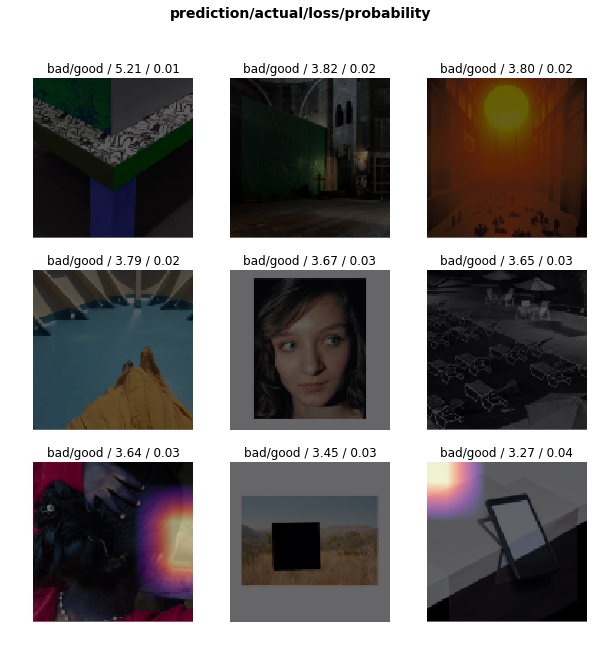

In [154]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(10,10))

### Plot Confusion Matrix

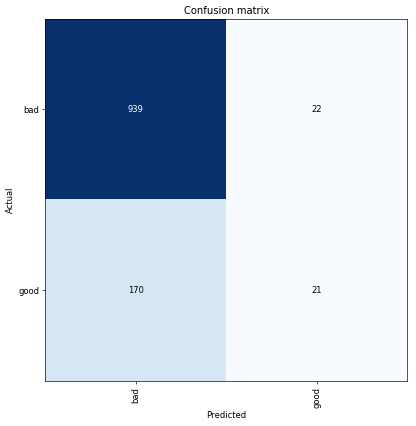

In [155]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

### Show Some Good Images

In [301]:
results = []
for img in learn.data.valid_ds:
    pred = learn.predict(img[0])
    if pred[2][1] > 0.6:
        results.append((img[0], pred))

    if len(results) > 9:
        break

results

[(Image (3, 112, 112), (Category good, tensor(1), tensor([0.3365, 0.6635]))),
 (Image (3, 112, 112), (Category good, tensor(1), tensor([0.3802, 0.6198]))),
 (Image (3, 112, 112), (Category good, tensor(1), tensor([0.2673, 0.7327]))),
 (Image (3, 112, 112), (Category good, tensor(1), tensor([0.2330, 0.7670]))),
 (Image (3, 112, 112), (Category good, tensor(1), tensor([0.3458, 0.6542]))),
 (Image (3, 112, 112), (Category good, tensor(1), tensor([0.2536, 0.7464]))),
 (Image (3, 112, 112), (Category good, tensor(1), tensor([0.2790, 0.7210]))),
 (Image (3, 112, 112), (Category good, tensor(1), tensor([0.3012, 0.6988]))),
 (Image (3, 112, 112), (Category good, tensor(1), tensor([0.3899, 0.6101]))),
 (Image (3, 112, 112), (Category good, tensor(1), tensor([0.3620, 0.6380])))]

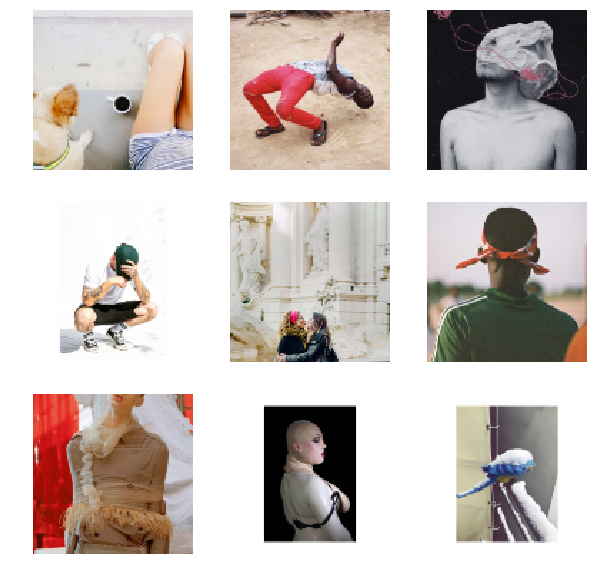

In [302]:
show_all([r[0] for r in results], r=3, figsize=(10,10))

### Show Some Bad Images

In [303]:
bad_results = []
for img in learn.data.valid_ds:
    pred = learn.predict(img[0])
    if pred[2][0] > 0.95:
        bad_results.append((img[0], pred))

    if len(bad_results) > 9:
        break

bad_results

[(Image (3, 112, 112), (Category bad, tensor(0), tensor([0.9709, 0.0291]))),
 (Image (3, 112, 112), (Category bad, tensor(0), tensor([0.9879, 0.0121]))),
 (Image (3, 112, 112), (Category bad, tensor(0), tensor([0.9577, 0.0423]))),
 (Image (3, 112, 112), (Category bad, tensor(0), tensor([0.9609, 0.0391]))),
 (Image (3, 112, 112), (Category bad, tensor(0), tensor([0.9661, 0.0339]))),
 (Image (3, 112, 112), (Category bad, tensor(0), tensor([0.9637, 0.0363]))),
 (Image (3, 112, 112), (Category bad, tensor(0), tensor([0.9524, 0.0476]))),
 (Image (3, 112, 112), (Category bad, tensor(0), tensor([0.9677, 0.0323]))),
 (Image (3, 112, 112), (Category bad, tensor(0), tensor([0.9705, 0.0295]))),
 (Image (3, 112, 112), (Category bad, tensor(0), tensor([0.9838, 0.0162])))]

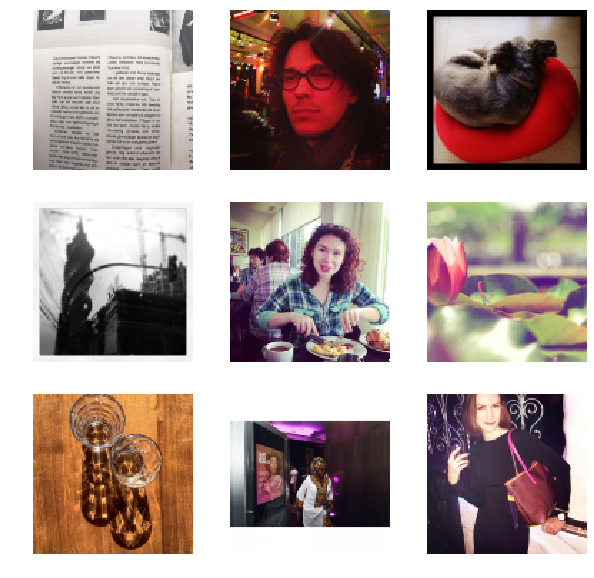

In [304]:
show_all([r[0] for r in bad_results], r=3, figsize=(10,10))